# Import Libraries

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

In [19]:
data='diabetes.csv'
df=pd.read_csv(data)

# Understanding the Dataset

In [20]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [21]:
print(df.head())
print(f"\n Column Shape is: {df.shape}\n")
print(f"\nColumn Datatypes: {"\n"}{df.dtypes}\n")
print(f"Column Summary: {"\n"} {df.describe()}\n")

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

 Column Shape is: (768, 9)


Column Datatypes: 
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Ag

# FINDING HOW MANY TYPES AND WHAT ARE THEY

In [22]:
# Seeing the number unique values
for i in df.columns:
    print('COLUMN NAME:',i)
    print('Number of unique values:',df[i].nunique())
    a=df[i].nunique()
    if a <= 10 :
        print(df[i].value_counts())
    print('---------------------------------')

COLUMN NAME: Pregnancies
Number of unique values: 17
---------------------------------
COLUMN NAME: Glucose
Number of unique values: 136
---------------------------------
COLUMN NAME: BloodPressure
Number of unique values: 47
---------------------------------
COLUMN NAME: SkinThickness
Number of unique values: 51
---------------------------------
COLUMN NAME: Insulin
Number of unique values: 186
---------------------------------
COLUMN NAME: BMI
Number of unique values: 248
---------------------------------
COLUMN NAME: DiabetesPedigreeFunction
Number of unique values: 517
---------------------------------
COLUMN NAME: Age
Number of unique values: 52
---------------------------------
COLUMN NAME: Outcome
Number of unique values: 2
Outcome
0    500
1    268
Name: count, dtype: int64
---------------------------------


# Check & Handling Null values

In [23]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Check & Handling Duplicates

In [24]:
df.duplicated().sum()
#df.drop_duplicates(inplace=True)

0

# FINDING DISTRIBUTION

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<Axes: xlabel='BMI', ylabel='Count'>

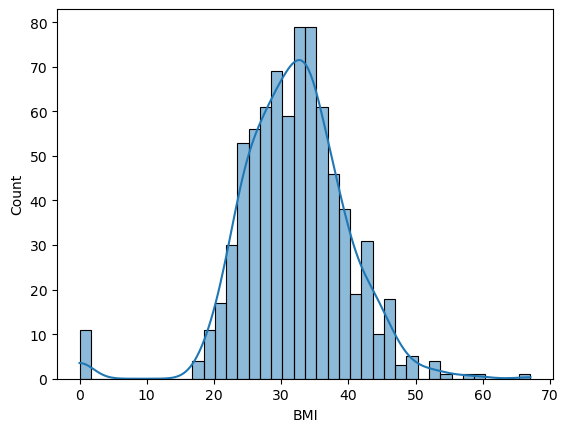

In [26]:
sns.histplot(x="BMI",data=df,kde=True,bins=40)

<Axes: xlabel='DiabetesPedigreeFunction', ylabel='Count'>

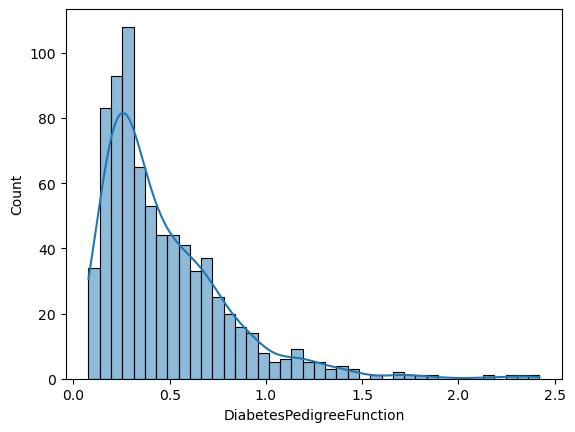

In [27]:
sns.histplot(x="DiabetesPedigreeFunction",data=df,kde=True,bins=40)

<Axes: xlabel='Insulin', ylabel='Count'>

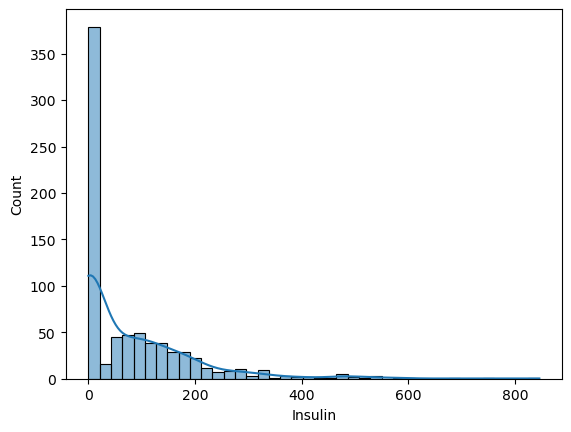

In [28]:
sns.histplot(x="Insulin",data=df,kde=True,bins=40)

# Check & Handling Outliers

In [29]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


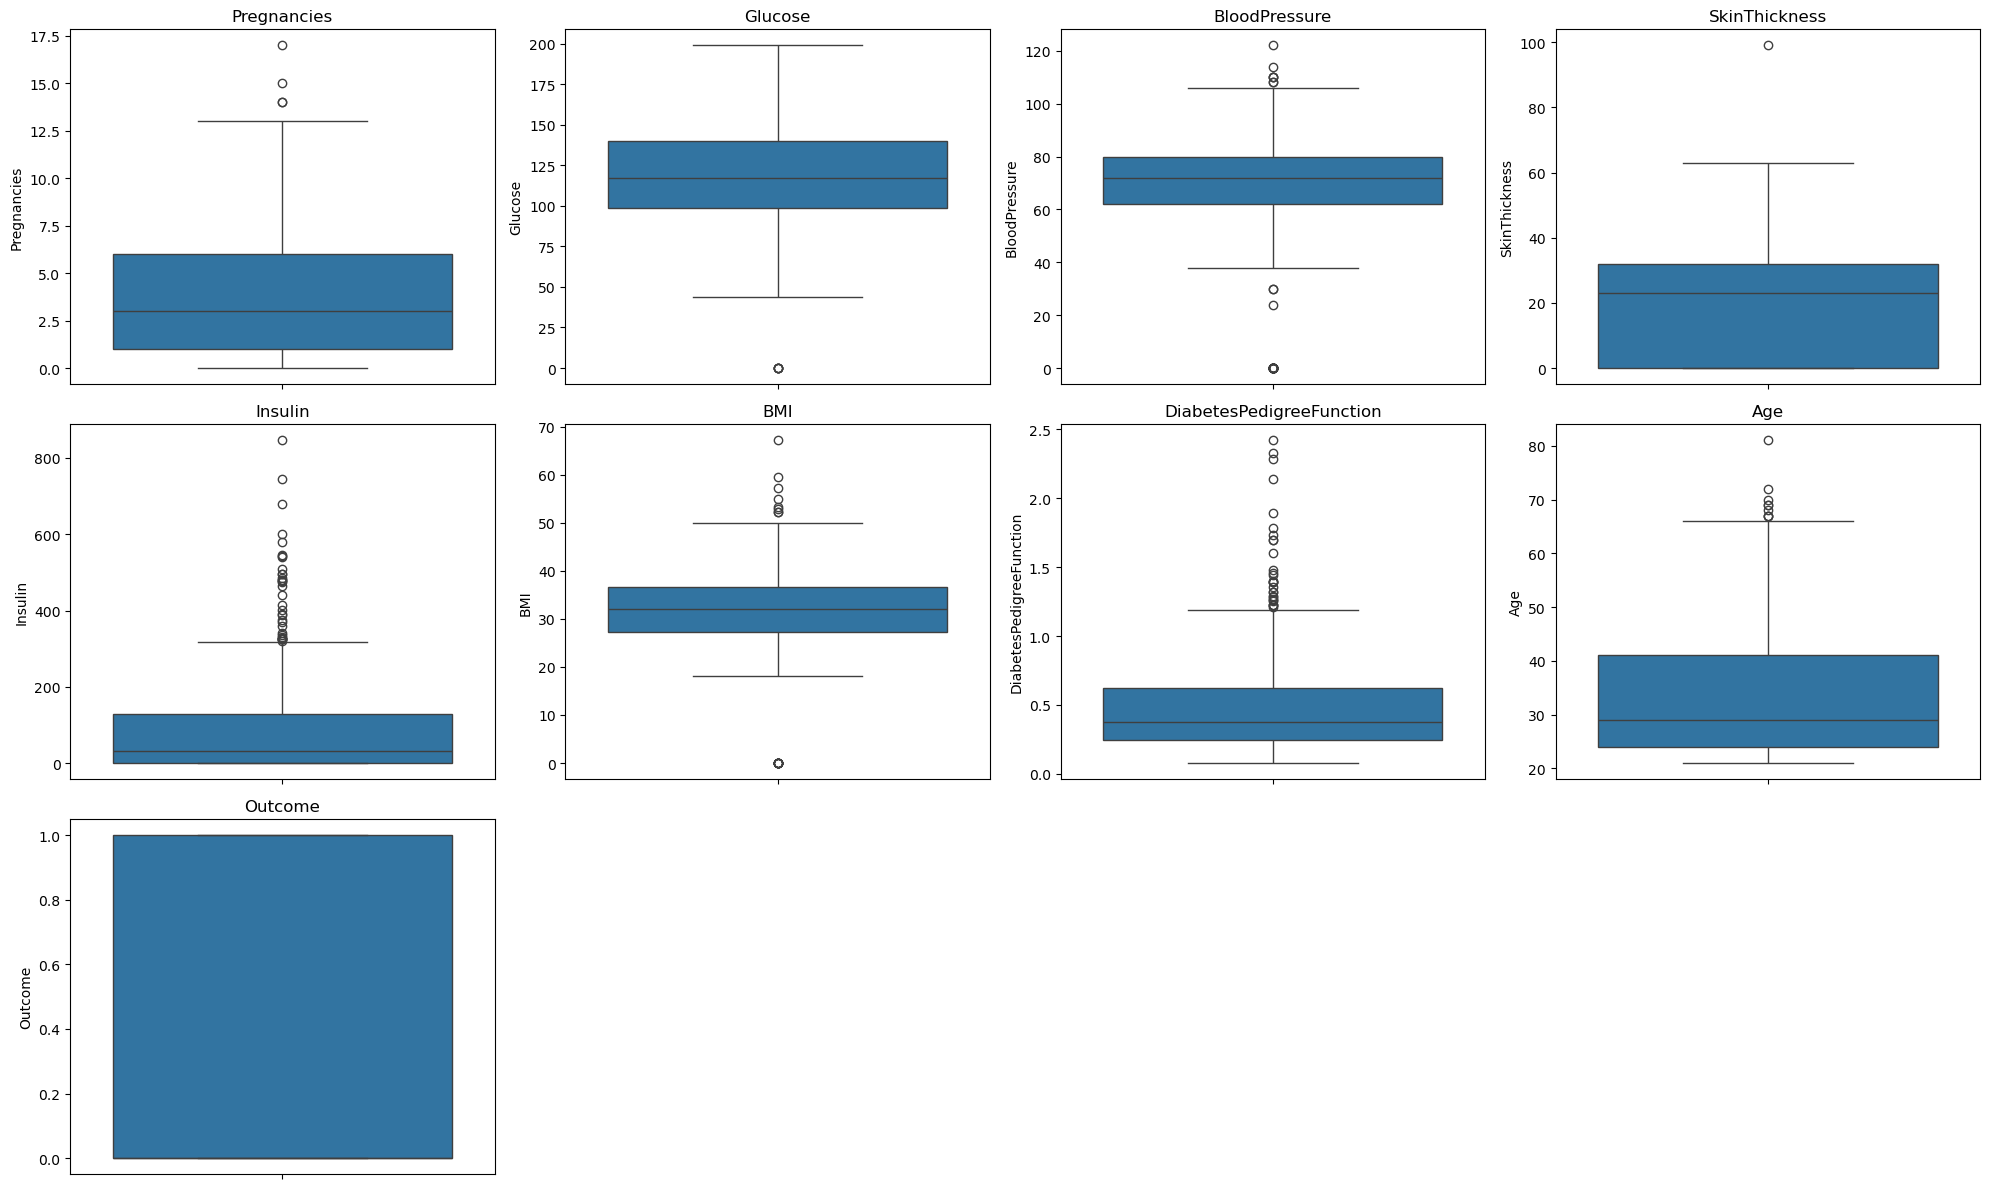

In [30]:
numeric_cols = df.select_dtypes(exclude='object').columns
n_cols = 4
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols
plt.figure(figsize=(5 * n_cols, 4 * n_rows))
for i, col in enumerate(numeric_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [31]:
# Use IQR method to identify outliers for numerical features:
for col in df.select_dtypes(include=np.number).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"Outliers in {col}: {outliers.shape[0]}")

Outliers in Pregnancies: 4
Outliers in Glucose: 5
Outliers in BloodPressure: 45
Outliers in SkinThickness: 1
Outliers in Insulin: 34
Outliers in BMI: 19
Outliers in DiabetesPedigreeFunction: 29
Outliers in Age: 9
Outliers in Outcome: 0


In [32]:
numeric_cols = df.select_dtypes(include='number').columns
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower=lower, upper=upper)

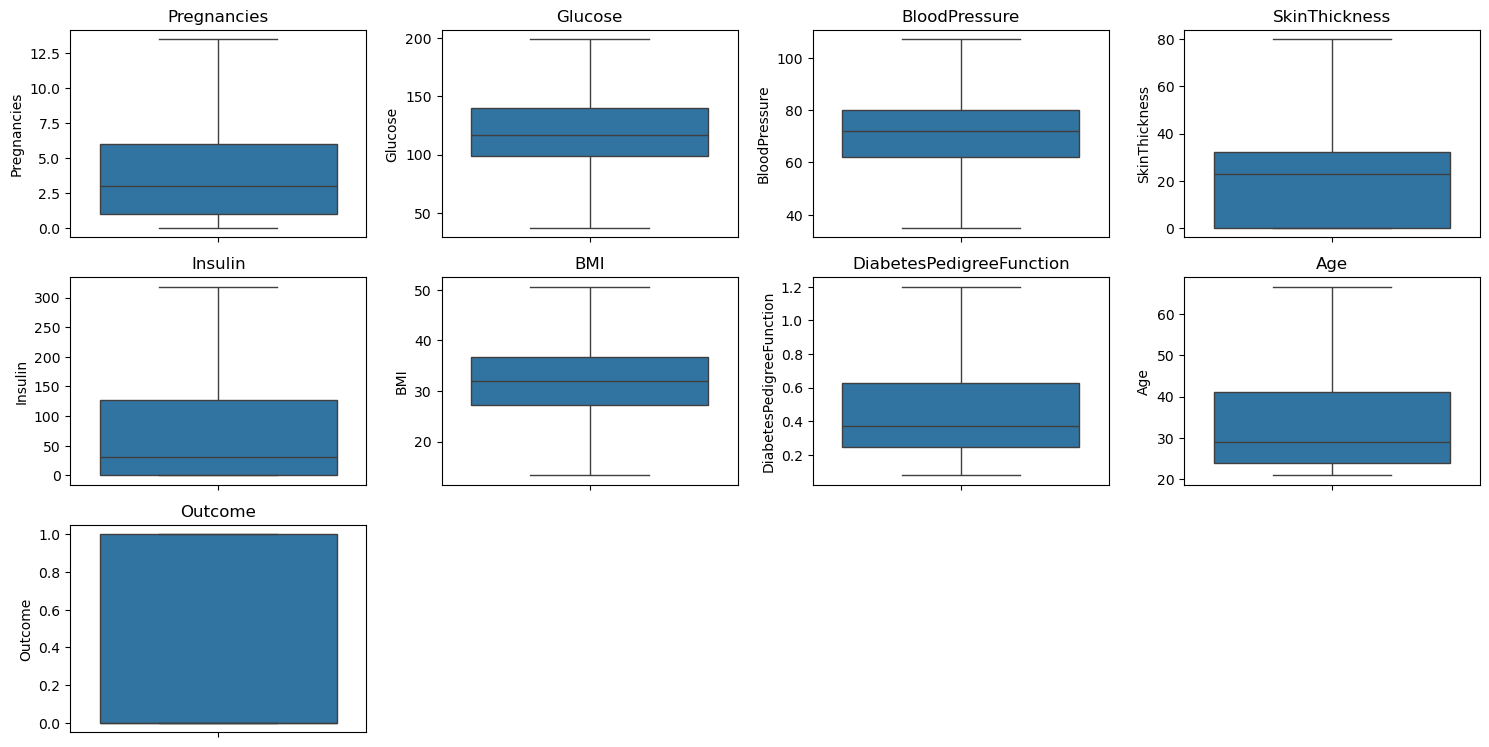

In [33]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.columns):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

# FINDING CO-RELATION

In [34]:
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72,35,0.0,33.6,0.627,50.0,1
1,1.0,85.0,66,29,0.0,26.6,0.351,31.0,0
2,8.0,183.0,64,0,0.0,23.3,0.672,32.0,1
3,1.0,89.0,66,23,94.0,28.1,0.167,21.0,0
4,0.0,137.0,40,35,168.0,43.1,1.200,33.0,1


In [35]:
df1=df.iloc[:,:-1]
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72,35,0.0,33.6,0.627,50.0
1,1.0,85.0,66,29,0.0,26.6,0.351,31.0
2,8.0,183.0,64,0,0.0,23.3,0.672,32.0
3,1.0,89.0,66,23,94.0,28.1,0.167,21.0
4,0.0,137.0,40,35,168.0,43.1,1.200,33.0


In [36]:
df1.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.128987,0.184307,-0.084349,-0.077793,0.024681,-0.017398,0.549695
Glucose,0.128987,1.000000,0.197865,0.059806,0.315856,0.235542,0.120213,0.269056
BloodPressure,0.184307,0.197865,1.000000,0.152644,0.050080,0.282544,0.038793,0.304208
SkinThickness,-0.084349,0.059806,0.152644,1.000000,0.488101,0.401494,0.177920,-0.119170
Insulin,-0.077793,0.315856,0.050080,0.488101,1.000000,0.209665,0.190087,-0.065547
BMI,0.024681,0.235542,0.282544,0.401494,0.209665,1.000000,0.141087,0.043375
DiabetesPedigreeFunction,-0.017398,0.120213,0.038793,0.177920,0.190087,0.141087,1.000000,0.047289
Age,0.549695,0.269056,0.304208,-0.119170,-0.065547,0.043375,0.047289,1.000000


# Split Indepentent and Depentent Features

In [37]:
x = df.drop('Outcome', axis=1)
y = df['Outcome']

# split Train and Test

In [38]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state=0)

# Scaling

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [40]:
print(x_train)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
499          6.0    154.0             74             32    193.0  29.30   
720          4.0     83.0             86             19      0.0  29.30   
556          1.0     97.0             70             40      0.0  38.10   
583          8.0    100.0             76              0      0.0  38.70   
150          1.0    136.0             74             50    204.0  37.40   
..           ...      ...            ...            ...      ...    ...   
763         10.0    101.0             76             48    180.0  32.90   
192          7.0    159.0             66              0      0.0  30.40   
629          4.0     94.0             65             22      0.0  24.70   
559         11.0     85.0             74              0      0.0  30.10   
684          5.0    136.0             82              0      0.0  13.35   

     DiabetesPedigreeFunction   Age  
499                     0.839  39.0  
720                    

# Logistic Regression Model Selection

In [42]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model

LogisticRegression()

In [58]:
model.fit(x_train, y_train)

SVC(kernel='linear')

Predict the new y value for Accuracy check

In [59]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

y_pred = model.predict(x_test)

In [60]:
print(y_pred)

[1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1
 1 0 0]


# Check Accuracy, Recall, Precision, F1 Score

In [61]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy*100:.2f}%")
print(f"Recall: {recall*100:.2f}%")
print(f"Precision: {precision*100:.2f}%")
print(f"F1 Score: {f1*100:.2f}%")

Accuracy: 87.01%
Recall: 87.01%
Precision: 86.97%
F1 Score: 86.72%


In [62]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.94      0.91        51
           1       0.86      0.73      0.79        26

    accuracy                           0.87        77
   macro avg       0.87      0.84      0.85        77
weighted avg       0.87      0.87      0.87        77



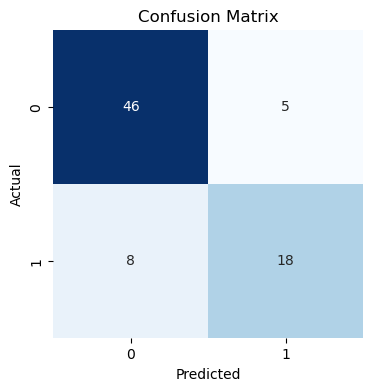

In [48]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [49]:
from sklearn.svm import SVC
model=SVC(kernel='linear')
model.fit(x_train,y_train)

SVC(kernel='linear')

In [50]:
y_pred=model.predict(x_test)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0], dtype=int64)

In [51]:
accuracy= accuracy_score(y_test,y_pred)
print(f'accuracy: {accuracy * 100:.2f}%')

accuracy: 87.01%


In [63]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0)
rf.fit(x_train_scaled, y_train)
y_pred_rf = rf.predict(x_test_scaled)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest Accuracy: 0.7922077922077922


In [64]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5]
}
grid = GridSearchCV(RandomForestClassifier(random_state=0), param_grid, cv=5, scoring='accuracy')
grid.fit(x_train, y_train)
print("Best Parameters:", grid.best_params_)


Best Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}


In [66]:
from sklearn.ensemble import RandomForestClassifier
new_rf = RandomForestClassifier(max_depth= 10, min_samples_split= 5, n_estimators= 100)
new_rf.fit(x_train_scaled, y_train)
new_y_pred_rf = new_rf.predict(x_test_scaled)
print("Random Forest Accuracy:", accuracy_score(y_test, new_y_pred_rf))

Random Forest Accuracy: 0.7922077922077922
